# Time Block vs Crime Rate
----

In [158]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2003-2007 Time Block

In [159]:
# Load CSV for crime 2003-2007
crimeTG2003_2007 = pd.read_csv("Source CSVs/Crime2003-2007_with_timeblocks.csv")
# Drop unnamed columns
crimeTG2003_2007 = crimeTG2003_2007.loc[:, ~crimeTG2003_2007.columns.str.contains('^Unnamed')]
crimeTG2003_2007.head()

,Incident ID,Category,Description,Day,Time,District,Longitude,Latitude,Year,Time Group
0,91192460,FORGERY/COUNTERFEITING,"COUNTERFEITING, COINS OR NOTES",Monday,2359,INGLESIDE,-122.409528,37.744432,2007,After Hours
1,80000177,WEAPON LAWS,POSS OF LOADED FIREARM,Monday,2358,CENTRAL,-122.396305,37.793257,2007,After Hours
2,80000058,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,2355,CENTRAL,-122.404260,37.798116,2007,After Hours
3,80000111,ASSAULT,BATTERY OF A POLICE OFFICER,Monday,2355,MISSION,-122.412351,37.757431,2007,After Hours
4,80000111,OTHER OFFENSES,CONSPIRACY,Monday,2355,MISSION,-122.412351,37.757431,2007,After Hours


In [160]:
# Drop unwanted colums for analysis
newCrimeTG2003_2007 = crimeTG2003_2007.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrimeTG2003_2007.head()

,Category,Description,Year,Time Group
0,FORGERY/COUNTERFEITING,"COUNTERFEITING, COINS OR NOTES",2007,After Hours
1,WEAPON LAWS,POSS OF LOADED FIREARM,2007,After Hours
2,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,2007,After Hours
3,ASSAULT,BATTERY OF A POLICE OFFICER,2007,After Hours
4,OTHER OFFENSES,CONSPIRACY,2007,After Hours


In [161]:
# Create a group based on the values in the 'Year' column
crimeyearsTG0307_group = newCrimeTG2003_2007.groupby(['Year', 'Time Group'])
# Count every occurance in the Year group
crimeTG0307_count = crimeyearsTG0307_group['Time Group'].count()
crimeTG0307_count

Year  Time Group     
2003  After Hours        67414
      Business Hours     58025
      Graveyard Hours    18713
2004  After Hours        69167
      Business Hours     59462
      Graveyard Hours    19519
2005  After Hours        66315
      Business Hours     56446
      Graveyard Hours    19425
2006  After Hours        63359
      Business Hours     55970
      Graveyard Hours    18524
2007  After Hours        64200
      Business Hours     55303
      Graveyard Hours    18136
Name: Time Group, dtype: int64

In [162]:
# Create a data frame using the series 
crimeTG0307_countdf = pd.DataFrame(crimeTG0307_count)
# Reset index 
crimeTG0307_countdf = crimeTG0307_countdf.rename(columns={"Time Group": "Crime Incidents"})
crimeTG0307_countdf = crimeTG0307_countdf.reset_index()
crimeTG0307_countdf.head()

,Year,Time Group,Crime Incidents
0,2003,After Hours,67414
1,2003,Business Hours,58025
2,2003,Graveyard Hours,18713
3,2004,After Hours,69167
4,2004,Business Hours,59462


In [163]:
# Load CSV for trees 2003-2007
treesTG2003_2007 = pd.read_csv("Source CSVs/SF_Trees2003-2007.csv")
# Drop unnamed columns
treesTG2003_2007 = treesTG2003_2007.loc[:, ~treesTG2003_2007.columns.str.contains('^Unnamed')]

In [164]:
# Drop unwanted columns for analysis
newTreesTG2003_2007 = treesTG2003_2007.drop(columns =['Tree ID', 'Latitude', 'Longitude'])
newTreesTG2003_2007.head()

,Species,Year
0,Ginkgo biloba :: Maidenhair Tree,2005
1,Pittosporum undulatum :: Victorian Box,2006
2,Prunus cerasifera :: Cherry Plum,2004
3,Prunus cerasifera :: Cherry Plum,2005
4,Prunus cerasifera :: Cherry Plum,2005


In [165]:
# Create a group based on the values in the 'Year' column
treeyearsTG0307_group = newTreesTG2003_2007.groupby('Year')
# Count how many times a tree was planted in each year
# Multiply count to fit the scale of crime incidents
treeTG0307_count = treeyearsTG0307_group['Year'].count()
treeTG0307_count

Year
2003    2017
2004     994
2005    1628
2006    2092
2007    2175
Name: Year, dtype: int64

In [166]:
# Create a data using the series 
treeTG0307_countdf = pd.DataFrame(treeTG0307_count)
# Reset index and reame 'Year' column
treeTG0307_countdf = treeTG0307_countdf.rename(columns={"Year": "Trees Planted"})
#treeTG0307_countdf = treeTG0307_countdf.reset_index()
treeTG0307_countdf

,Trees Planted
Year,
2003,2017
2004,994
2005,1628
2006,2092
2007,2175


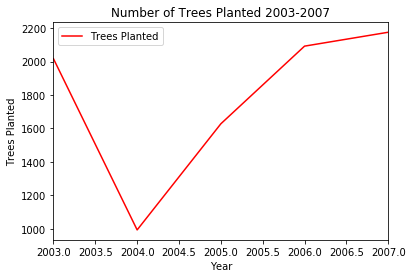

In [167]:
# Configure plot and ticks
treeTG0307_countdf.plot(color="red")

# Set textual properties
plt.title("Number of Trees Planted 2003-2007")
plt.xlabel("Year")
plt.ylabel("Trees Planted")
plt.savefig("Images/TreesPlanted2003-2007.png")


In [168]:
# Merge 2003-2007 blocks for crime and trees
mergedTG2003_2007 = pd.merge(crimeTG0307_countdf, treeTG0307_countdf, on='Year', how="outer")
mergedTG2003_2007.head()

,Year,Time Group,Crime Incidents,Trees Planted
0,2003,After Hours,67414,2017
1,2003,Business Hours,58025,2017
2,2003,Graveyard Hours,18713,2017
3,2004,After Hours,69167,994
4,2004,Business Hours,59462,994


In [169]:
mungeCrimeTG2003_2007 = mergedTG2003_2007.pivot(index ='Year', columns ='Time Group', values=['Crime Incidents', "Trees Planted"])
mungeCrimeTG2003_2007

Crime Incidents                                Trees Planted  \
Time Group     After Hours Business Hours Graveyard Hours   After Hours   
Year                                                                      
2003                 67414          58025           18713          2017   
2004                 69167          59462           19519           994   
2005                 66315          56446           19425          1628   
2006                 63359          55970           18524          2092   
2007                 64200          55303           18136          2175   

                                           
Time Group Business Hours Graveyard Hours  
Year                                       
2003                 2017            2017  
2004                  994             994  
2005                 1628            1628  
2006                 2092            2092  
2007                 2175            2175

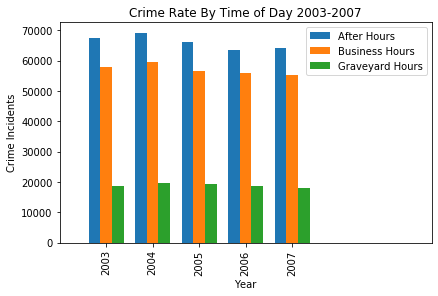

In [170]:
mungeCrimeTG2003_2007["Crime Incidents"][["After Hours", "Business Hours", "Graveyard Hours"]].plot(kind='bar', width=.75)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7)
plt.title("Crime Rate By Time of Day 2003-2007")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/TimeGroupCrime2003-2007.png")


# 2008-2012 Time Block

In [171]:
# Load CSV for crime 2008-2012
crime2008_2012 = pd.read_csv("Source CSVs/Crime2008-2012_with_timeblocks.csv")
# Drop unnamed columns
crime2008_2012 = crime2008_2012.loc[:, ~crime2008_2012.columns.str.contains('^Unnamed')]

In [172]:
# Drop unwanted columns for analysis
newCrime2008_2012 = crime2008_2012.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrime2008_2012.head()

,Category,Description,Year,Time Group
0,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,2012,After Hours
1,STOLEN PROPERTY,"STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RE...",2012,After Hours
2,WEAPON LAWS,POSS OF LOADED FIREARM,2012,After Hours
3,OTHER OFFENSES,PAROLE VIOLATION,2012,After Hours
4,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2012,After Hours


In [173]:
# Create a group based on the values in the 'Year' column
crimeyears0812_group = newCrime2008_2012.groupby(['Year', 'Time Group'])
# Count every occurance for each year
crime0812_count = crimeyears0812_group['Time Group'].count()
crime0812_count

Year  Time Group     
2008  After Hours        65013
      Business Hours     57147
      Graveyard Hours    19151
2009  After Hours        64052
      Business Hours     56567
      Graveyard Hours    19241
2010  After Hours        63696
      Business Hours     52261
      Graveyard Hours    17566
2011  After Hours        63167
      Business Hours     51818
      Graveyard Hours    17712
2012  After Hours        67732
      Business Hours     54952
      Graveyard Hours    18163
Name: Time Group, dtype: int64

In [174]:
# Create a data frame using the series
crime0812_countdf = pd.DataFrame(crime0812_count)
# Reset the index and rename the 'Year' column
crime0812_countdf = crime0812_countdf.rename(columns={"Time Group": "Crime Incidents"})
crime0812_countdf = crime0812_countdf.reset_index()
crime0812_countdf.head()

,Year,Time Group,Crime Incidents
0,2008,After Hours,65013
1,2008,Business Hours,57147
2,2008,Graveyard Hours,19151
3,2009,After Hours,64052
4,2009,Business Hours,56567


In [175]:
# Load CSV for trees 2008-2012
trees2008_2012 = pd.read_csv("Source CSVs/SF_Trees2007-2012.csv")
# Drop unnamed columns
trees2008_2012 = trees2008_2012.loc[:, ~trees2008_2012.columns.str.contains('^Unnamed')]

In [176]:
# Drop unwanted columna for analysis
newTrees2008_2012 = trees2008_2012.drop(columns =['Latitude', 'Longitude'])
newTrees2008_2012.head()

,Tree ID,Species,Year
0,102172,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2012
1,102171,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2012
2,82730,Tristaniopsis laurina :: Swamp Myrtle,2008
3,82709,Casurina stricta :: Beefwood: Drooping She-Oak,2009
4,103814,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,2009


In [177]:
# Create a group based on the values in the 'Year' column
treeyears0812_group = newTrees2008_2012.groupby('Year')
# Count the number trees planted each year
# Multiply the count to fit the scale of the crime count
tree0812_count = treeyears0812_group['Year'].count()
tree0812_count

Year
2008    4289
2009    1799
2010    1072
2011    1481
2012     959
Name: Year, dtype: int64

In [178]:
#Create a data frame using the series
tree0812_countdf = pd.DataFrame(tree0812_count)
tree0812_countdf = tree0812_countdf.rename(columns={"Year": "Trees Planted"})
#tree0812_countdf = tree0812_countdf.reset_index()
tree0812_countdf

,Trees Planted
Year,
2008,4289
2009,1799
2010,1072
2011,1481
2012,959


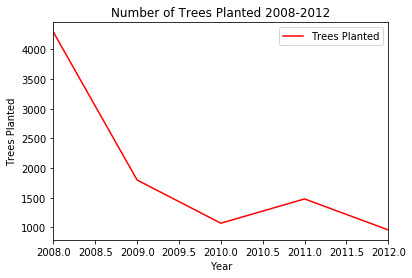

In [179]:
# Configure plot and ticks
tree0812_countdf.plot(color="red")

# Set textual properties
plt.title("Number of Trees Planted 2008-2012")
plt.xlabel("Year")
plt.ylabel("Trees Planted")
plt.savefig("Images/TreesPlanted2008-2012.png")

In [180]:
# Merge 2008-2012 blocks for crime and trees
merged2008_2012 = pd.merge(crime0812_countdf, tree0812_countdf, on='Year', how="outer")
merged2008_2012.head()

,Year,Time Group,Crime Incidents,Trees Planted
0,2008,After Hours,65013,4289
1,2008,Business Hours,57147,4289
2,2008,Graveyard Hours,19151,4289
3,2009,After Hours,64052,1799
4,2009,Business Hours,56567,1799


In [181]:
mungeCrime2008_2012 = merged2008_2012.pivot(index ='Year', columns ='Time Group', values=['Crime Incidents', "Trees Planted"])
mungeCrime2008_2012

Crime Incidents                                Trees Planted  \
Time Group     After Hours Business Hours Graveyard Hours   After Hours   
Year                                                                      
2008                 65013          57147           19151          4289   
2009                 64052          56567           19241          1799   
2010                 63696          52261           17566          1072   
2011                 63167          51818           17712          1481   
2012                 67732          54952           18163           959   

                                           
Time Group Business Hours Graveyard Hours  
Year                                       
2008                 4289            4289  
2009                 1799            1799  
2010                 1072            1072  
2011                 1481            1481  
2012                  959             959

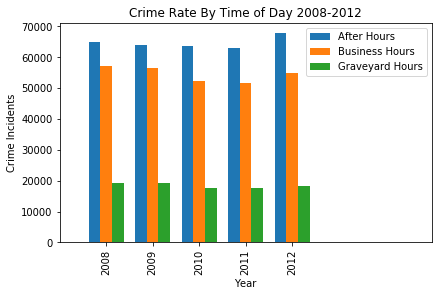

In [182]:
mungeCrime2008_2012["Crime Incidents"][["After Hours", "Business Hours", "Graveyard Hours"]].plot(kind='bar', width=.75)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7)
plt.title("Crime Rate By Time of Day 2008-2012")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/TimeGroupCrime2008-2012.png")


# 2013-2017 Time Block

In [183]:
# Load CSV for crime 2013-2017
crime2013_2017 = pd.read_csv("Source CSVs/Crime2013-2017_with_timeblocks.csv")
# Drop unnamed columns 
crime2013_2017 = crime2013_2017.loc[:, ~crime2013_2017.columns.str.contains('^Unnamed')]

In [184]:
# Drop unwanted columns fi=or analysis
newCrime2013_2017 = crime2013_2017.drop(columns =['Incident ID', 'Day', 'Time', 'District', 'Longitude', 'Latitude'])
newCrime2013_2017.head()

,Category,Description,Year,Time Group
0,ASSAULT,BATTERY,2017,After Hours
1,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,2017,After Hours
2,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",2017,After Hours
3,WEAPON LAWS,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,2017,After Hours
4,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2017,After Hours


In [185]:
# Create a group based on the values in the 'Year' column
crimeyears1317_group = newCrime2013_2017.groupby(['Year', 'Time Group'])
# Count the number of occurances for each year
crime1317_count = crimeyears1317_group['Time Group'].count()
crime1317_count

Year  Time Group     
2013  After Hours        72120
      Business Hours     60248
      Graveyard Hours    20438
2014  After Hours        72228
      Business Hours     58610
      Graveyard Hours    19290
2015  After Hours        75250
      Business Hours     61088
      Graveyard Hours    20188
2016  After Hours        69984
      Business Hours     60182
      Graveyard Hours    20716
2017  After Hours        72457
      Business Hours     62251
      Graveyard Hours    20065
Name: Time Group, dtype: int64

In [186]:
#Create a date frame using the series
crime1317_countdf = pd.DataFrame(crime1317_count)
# Reset index and rename the 'Year' column
crime1317_countdf = crime1317_countdf.rename(columns={"Time Group": "Crime Incidents"})
crime1317_countdf = crime1317_countdf.reset_index()
crime1317_countdf.head()

,Year,Time Group,Crime Incidents
0,2013,After Hours,72120
1,2013,Business Hours,60248
2,2013,Graveyard Hours,20438
3,2014,After Hours,72228
4,2014,Business Hours,58610


In [187]:
# Load CSV for trees 2013-2017
trees2013_2017 = pd.read_csv("Source CSVs/SF_Trees2013-2017.csv")
# Drop unnamed columns
trees2013_2017 = trees2013_2017.loc[:, ~trees2013_2017.columns.str.contains('^Unnamed')]

In [188]:
# Drop unwanted columns for analysis
newTrees2013_2017 = trees2013_2017.drop(columns =['Latitude', 'Longitude'])
newTrees2013_2017.head()

,Tree ID,Species,Year
0,115737,Acer rubrum :: Red Maple,2016
1,109770,Olea Majestic Beauty ::,2015
2,108715,Pittosporum undulatum :: Victorian Box,2016
3,115538,Crataegus laevigata :: English Hawthorn,2016
4,115537,Crataegus laevigata :: English Hawthorn,2016


In [189]:
# Create a group based on the values in the 'Year' column
treeyears1317_group = newTrees2013_2017.groupby('Year')
# Count how many trees planted each year
tree1317_count = treeyears1317_group['Year'].count()
tree1317_count

Year
2013     791
2014    1140
2015    1946
2016    1654
2017    1572
Name: Year, dtype: int64

In [190]:
# Create a data frame using the series
tree1317_countdf = pd.DataFrame(tree1317_count)
# Reset index and rename 'Year' column
tree1317_countdf = tree1317_countdf.rename(columns={"Year": "Trees Planted"})
#tree1317_countdf = tree1317_countdf.reset_index()
tree1317_countdf

,Trees Planted
Year,
2013,791
2014,1140
2015,1946
2016,1654
2017,1572


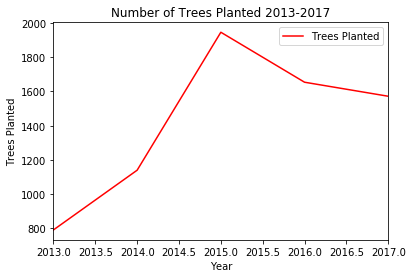

In [191]:
# Configure plot and ticks
tree1317_countdf.plot(color="red")

# Set textual properties
plt.title("Number of Trees Planted 2013-2017")
plt.xlabel("Year")
plt.ylabel("Trees Planted")
plt.savefig("Images/TreesPlanted2013-2017.png")

In [192]:
# merge 2013-2017 blocks for crime and trees
merged2013_2017 = pd.merge(crime1317_countdf, tree1317_countdf, on='Year', how="outer")
merged2013_2017.head()

,Year,Time Group,Crime Incidents,Trees Planted
0,2013,After Hours,72120,791
1,2013,Business Hours,60248,791
2,2013,Graveyard Hours,20438,791
3,2014,After Hours,72228,1140
4,2014,Business Hours,58610,1140


In [193]:
mungeCrime2013_2017 = merged2013_2017.pivot(index ='Year', columns ='Time Group', values=['Crime Incidents', "Trees Planted"])
mungeCrime2013_2017

Crime Incidents                                Trees Planted  \
Time Group     After Hours Business Hours Graveyard Hours   After Hours   
Year                                                                      
2013                 72120          60248           20438           791   
2014                 72228          58610           19290          1140   
2015                 75250          61088           20188          1946   
2016                 69984          60182           20716          1654   
2017                 72457          62251           20065          1572   

                                           
Time Group Business Hours Graveyard Hours  
Year                                       
2013                  791             791  
2014                 1140            1140  
2015                 1946            1946  
2016                 1654            1654  
2017                 1572            1572

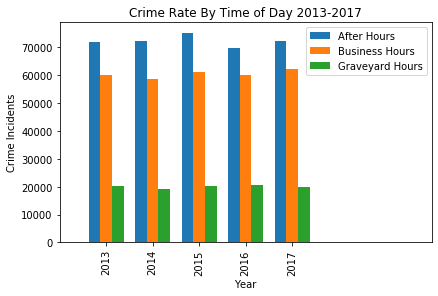

In [194]:
mungeCrime2013_2017["Crime Incidents"][["After Hours", "Business Hours", "Graveyard Hours"]].plot(kind='bar', width=.75)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7)
plt.title("Crime Rate By Time of Day 2013-2017")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/TimeGroupCrime2013-2017.png")